In [875]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [876]:
bank_db = pd.read_csv("bank-full.csv")

In [877]:
#Sampling the last ten rows to have an overview of the data set
bank_db.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [878]:
bank_db.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [879]:
rStruct = {'housing':{'no':0,'yes':1},
           'loan':{'no':0,'yes':1},
           'default': {'no':0,'yes':1},
           'Target':{'no':0,'yes':1},
           'education':{"unknown":0,"primary":1,"secondary":2,"tertiary":3},
           'month':{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
}
bank_db = bank_db.replace(rStruct)

In [880]:
bank_db['education'] = bank_db['education'].astype('category')
bank_db['month'] = bank_db['month'].astype('category')
bank_db['marital'] = bank_db['marital'].astype('category')
bank_db['job'] = bank_db['job'].astype('category')
bank_db['contact'] = bank_db['contact'].astype('category')
bank_db['poutcome'] = bank_db['poutcome'].astype('category')

In [881]:
#Measures of distribution
bank_db.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [882]:
#Checking data types for dataframe columns
bank_db.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target          int64
dtype: object

In [883]:
#checking the number of unique values in other to determine categorical variables
bank_db.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [884]:
#Storing the number of customers with a negative number of contacts and changing it to zero
days_last_contact = bank_db.pdays < 0
days_last_contact

0         True
1         True
2         True
3         True
4         True
         ...  
45206     True
45207     True
45208    False
45209     True
45210    False
Name: pdays, Length: 45211, dtype: bool

In [885]:
bank_db.loc[days_last_contact,'pdays'] = 0

In [886]:
bank_db.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,3,0,583,0,0,cellular,17,11,226,1,184,4,success,1
45202,34,admin.,single,2,0,557,0,0,cellular,17,11,224,1,0,0,unknown,1
45203,23,student,single,3,0,113,0,0,cellular,17,11,266,1,0,0,unknown,1
45204,73,retired,married,2,0,2850,0,0,cellular,17,11,300,1,40,8,failure,1
45205,25,technician,single,2,0,505,0,1,cellular,17,11,386,2,0,0,unknown,1
45206,51,technician,married,3,0,825,0,0,cellular,17,11,977,3,0,0,unknown,1
45207,71,retired,divorced,1,0,1729,0,0,cellular,17,11,456,2,0,0,unknown,1
45208,72,retired,married,2,0,5715,0,0,cellular,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,2,0,668,0,0,telephone,17,11,508,4,0,0,unknown,0
45210,37,entrepreneur,married,2,0,2971,0,0,cellular,17,11,361,2,188,11,other,0


In [887]:
#Understanding the shape and size of the data frame
print(bank_db.shape)
print(bank_db.size)

(45211, 17)
768587


In [888]:
bank_db.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

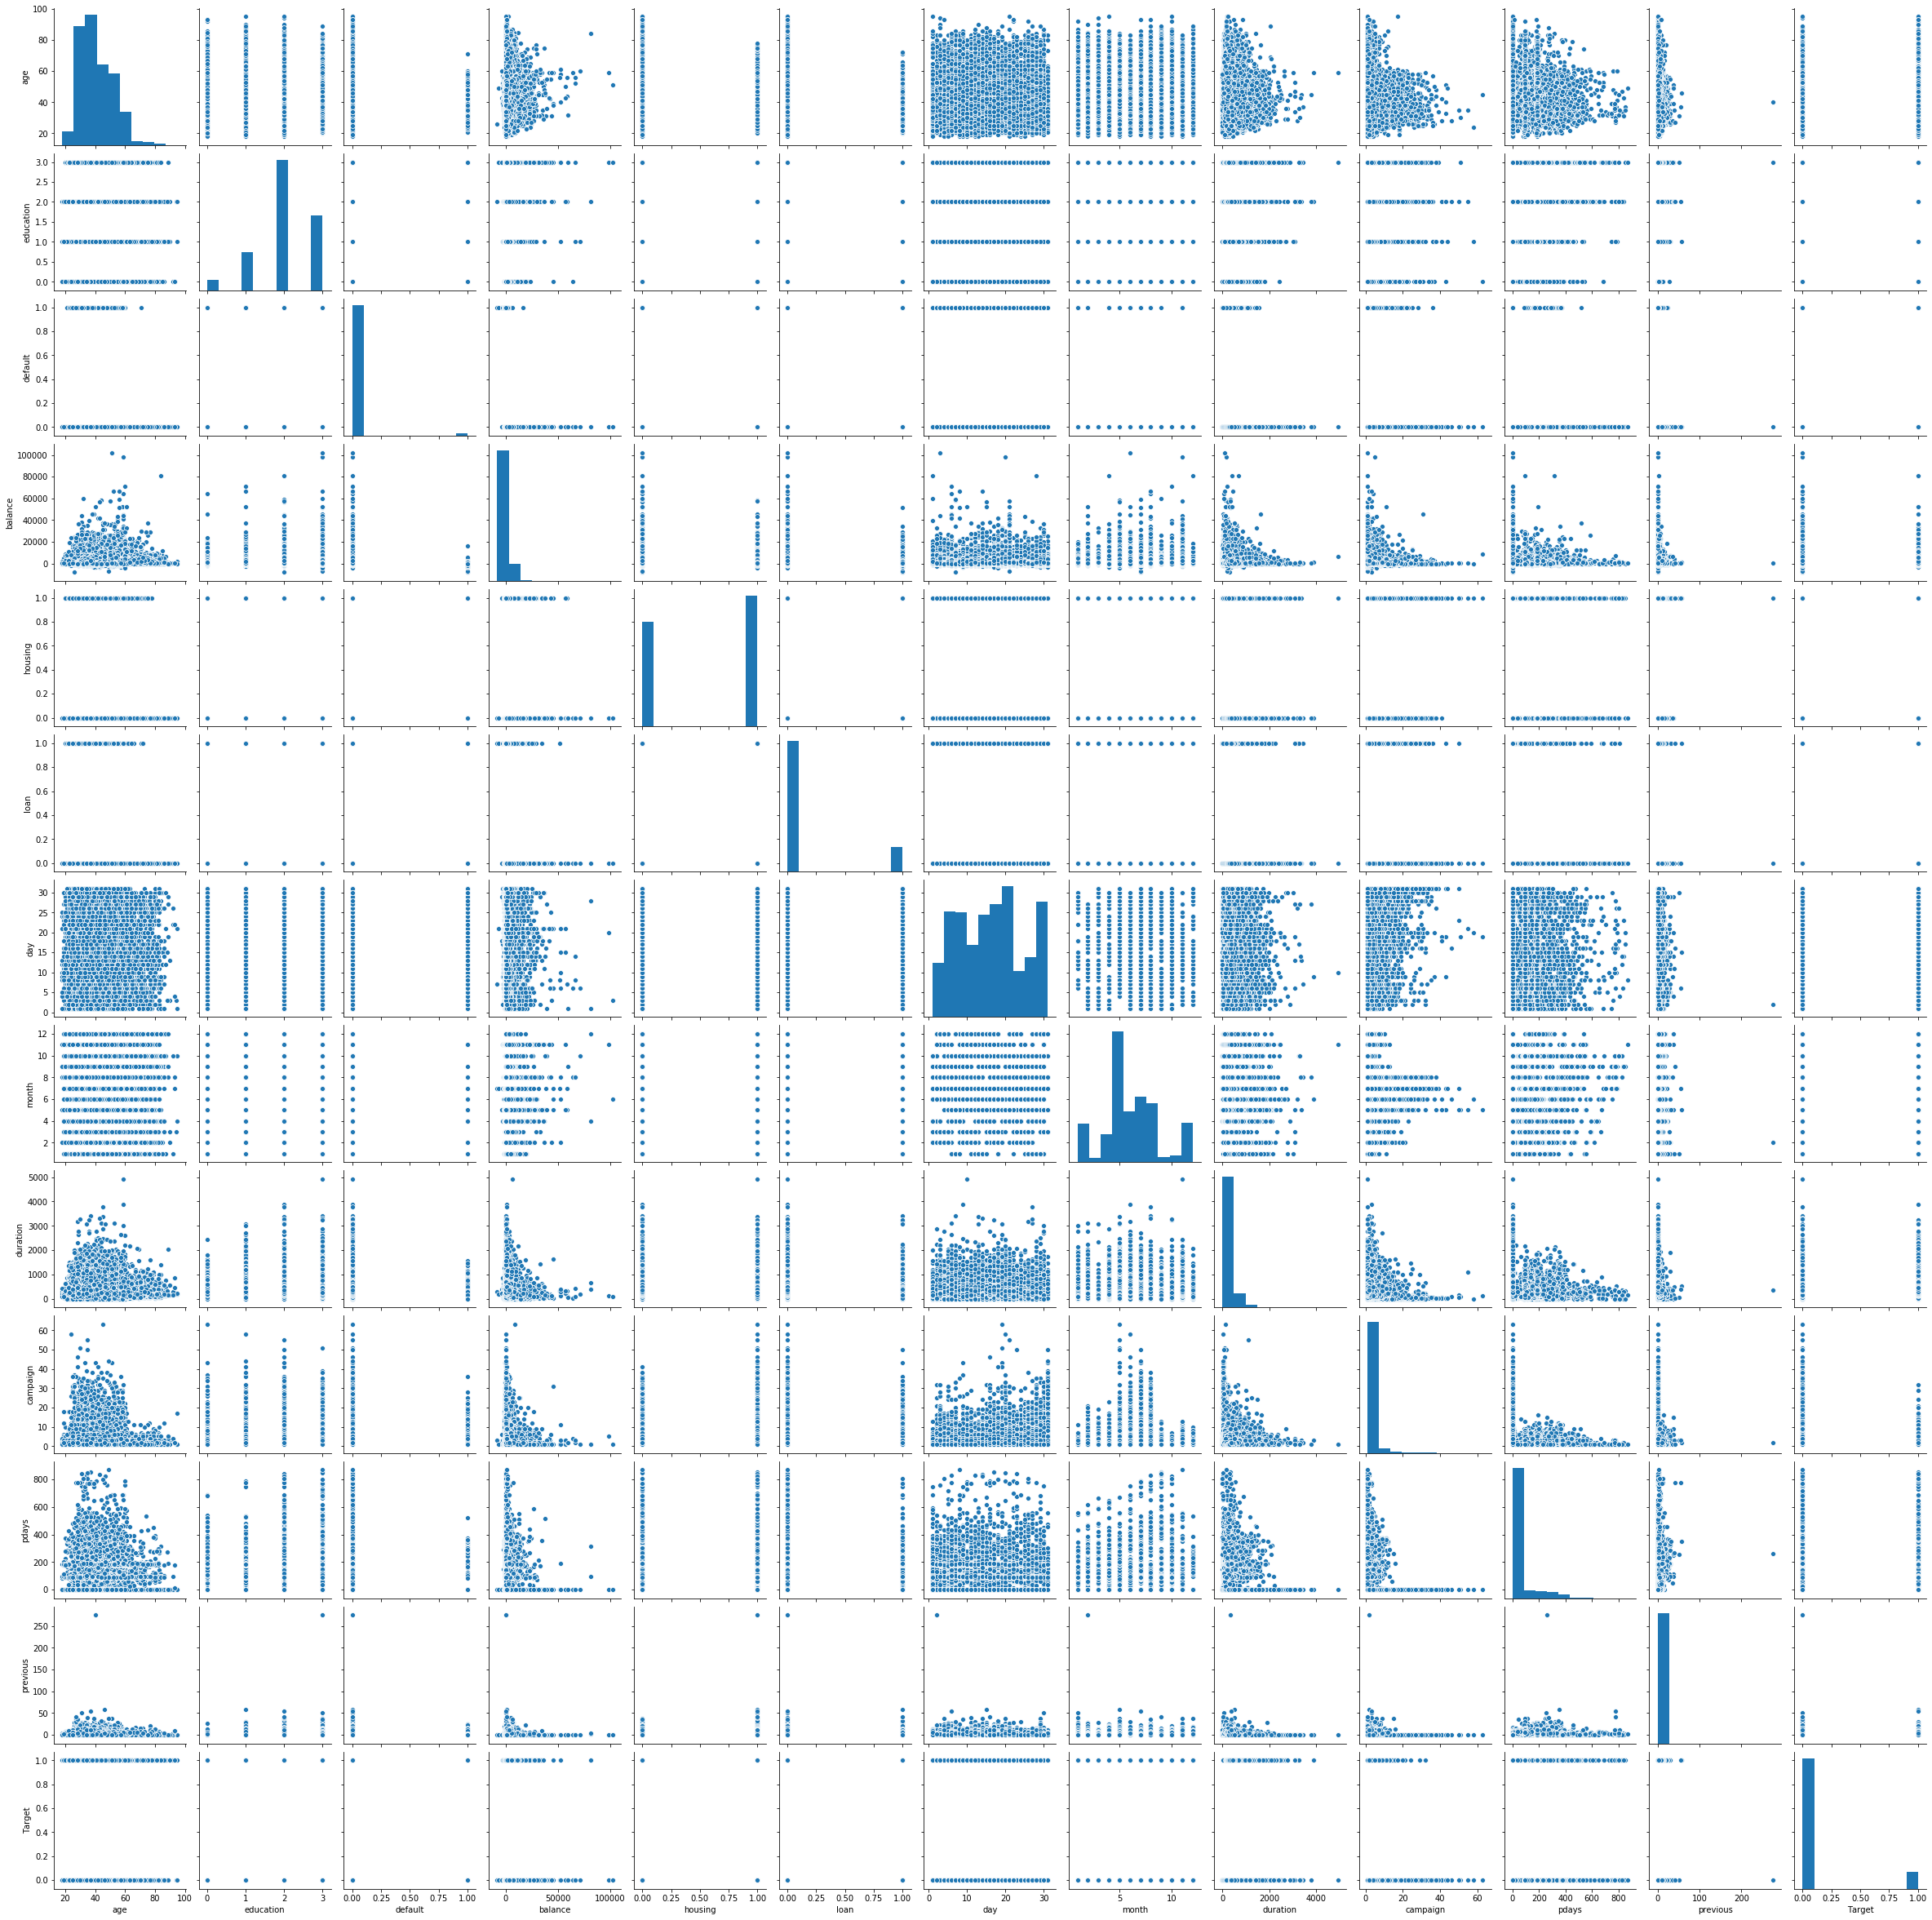

In [889]:
sns.pairplot(bank_db)
plt.show()

In [890]:
#columns count, non-null counts and memory usage
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(6), int64(11)
memory usage: 4.1 MB


In [891]:
#Checking the frequency of the data distribution to check for possible outliers
for cols in bank_db:
    print(bank_db[cols].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
2    23202
3    13301
1     6851
0     1857
Name: education, dtype: int64
0    44396
1      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906

In [892]:
#Too many values for duration and number of days since clients were contacted for last campaign
#Both are not useful either, they will therefore be dropped
#bank_db2 = bank_db.copy()
#bank_db.drop(['duration','pdays','previous','day'],axis=1,inplace=True)
from sklearn.preprocessing import MinMaxScaler
col_normalize = ['campaign','duration','previous','pdays']
val = bank_db[col_normalize].values
scaler = MinMaxScaler()
valScaled = scaler.fit_transform(val)
bankdb_dum = pd.DataFrame(valScaled,columns=col_normalize,index=bank_db.index)
bank_db[col_normalize] = bankdb_dum

In [893]:
bank_db.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target          int64
dtype: object

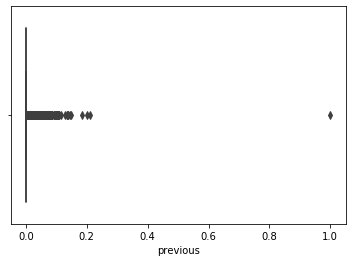

In [894]:
sns.boxplot(bank_db['previous']);

In [895]:
#This model assumes there are no middle ground for previous marketing campaign outcome
#Therefore, mapping is done to move all datasets classified as unknown and other, to failure
#This way, previous marketing campaign outcome can be regarded as either a success or a failure
rep = {'unknown':'failure','other':'failure'}
bank_db['poutcome'] = bank_db['poutcome'].replace(rep)
bank_db['poutcome'].value_counts()
#bankdb_dum

failure    43700
success     1511
Name: poutcome, dtype: int64

In [896]:
#Value Count of the Yes/No Categorical variables
valCount= bank_db[['housing','loan','default','Target']].sum().reset_index().rename(columns={'index':'ColName',0:'Value_count_1'})
valCount['Value_count_0'] = bank_db.shape[0] - valCount['Value_count_1']
valCount


,ColName,Value_count_1,Value_count_0
0,housing,25130,20081
1,loan,7244,37967
2,default,815,44396
3,Target,5289,39922


In [897]:
#Understanding the impact of previous marketing campaign outcome meter on whether client actually took a term deposit
#Both corr() function and grouping description shows the significance of poutcome variable in determining
#whether a client subscribed a term deposit or not. It will be dropped
bank_db.groupby('Target')['poutcome'].value_counts()

Target  poutcome
0       failure     39389
        success       533
1       failure      4311
        success       978
Name: poutcome, dtype: int64

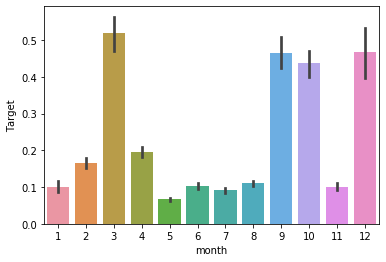

In [898]:
#Insight into the months of the year that more clients subscribed to a term deposit
#This may help in timing marketing campaigns
sns.barplot(x='month',y='Target',data=bank_db)

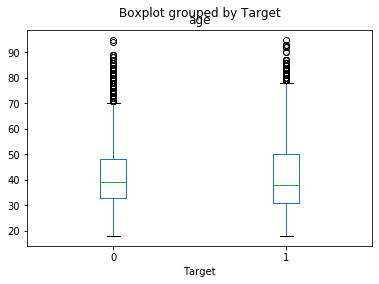

In [899]:
#Understanding the age bracket of majority of clients taking a term deposit
bank_db.boxplot(by='Target',column=['age'],grid=False)

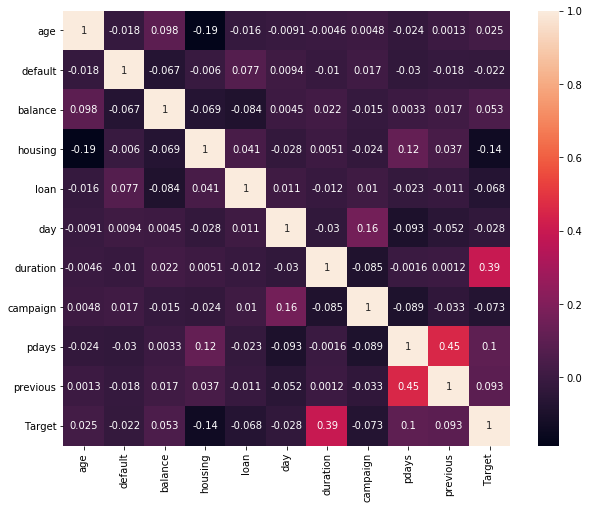

In [900]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_db.corr(),annot=True)
plt.show()

In [901]:
bank_db.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome       object
Target          int64
dtype: object

In [902]:
#One hot encoding for categorical columns
X = bank_db.drop('Target',axis=1)
Y = bank_db.pop('Target')
oneHot = ['job','marital','education','month','poutcome','contact']
X = pd.get_dummies(X,columns=oneHot)

In [903]:
#bankdb_dum[['Target','poutcome_success']].corr()

In [904]:
#Creation of training and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=1)

In [933]:
#Creation of logistic regression model
from sklearn.linear_model import LogisticRegression
#Hyper tuning of the solver shows 'liblinear' is the best
logmodel = LogisticRegression(solver='liblinear',random_state=1)
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [934]:
#Logistic Regression accuracy score
Y_predict = logmodel.predict(X_test)
print("Training accuracy",logmodel.score(X_train,Y_train))
print("Testing accuracy",logmodel.score(X_test,Y_test))

Training accuracy 0.9016652447309381
Testing accuracy 0.9008404600412857


In [999]:
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score,roc_auc_score,accuracy_score

def drawconmat(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()


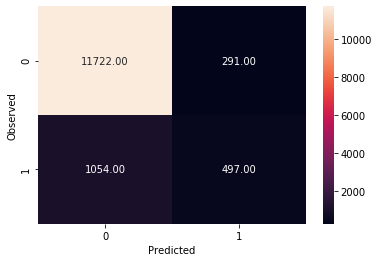

In [936]:
drawconmat(Y_test,Y_predict)

In [937]:
recall_score(Y_test,Y_predict)

0.32043842682140555

In [938]:
precision_score(Y_test,Y_predict)

0.6307106598984772

In [939]:
f1_score(Y_test,Y_predict)

0.4249679350149637

In [924]:
roc_auc_score(Y_test,Y_predict)

0.648107334612734

In [ ]:
#The Confusion matrix shows too many false Negatives.
#The bank will continue to lose customers as more potential clients are predicted to NOT take a term deposit.
#Focus should now be on improving the recall score of the model

In [940]:
#Decision Tree Classifier and its accuracy score
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [941]:
model_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [942]:
print("Train Score: %.2f" % model_entropy.score(X_train,Y_train))
print("Test Score: %.2f" % model_entropy.score(X_test,Y_test))

Train Score: 1.00
Test Score: 0.88


In [985]:
modelpruned = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [986]:
modelpruned.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [988]:
print("Train Score: %.2f" % modelpruned.score(X_train,Y_train))
print("Test Score: %.2f" % modelpruned.score(X_test,Y_test))

Train Score: 0.90
Test Score: 0.90


In [995]:
predict_train = modelpruned.predict(X_train)
predict_test = modelpruned.predict(X_test)

In [997]:
pd.crosstab(Y_test,predict_test,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11701,312
1,1025,526


In [1014]:
accuracyDT = accuracy_score(Y_test,predict_test)
recallDT = recall_score(Y_test,predict_test)
precisionDT = precision_score(Y_test,predict_test)
ROC_DT = roc_auc_score(Y_test,predict_test)
f1_DT = f1_score(Y_test,predict_test)

In [1015]:
#Accuracy Score for Decision Tree
resultsFrame = pd.DataFrame({"Method":['Decision Tree'],"Accuracy":accuracyDT,"Recall":recallDT,"Precision":precisionDT,"ROC":ROC_DT,"F1 Score":f1_DT})
resultsFrame = resultsFrame[['Method','Accuracy','Recall','Precision','ROC','F1 Score']]
resultsFrame

,Method,Accuracy,Recall,Precision,ROC,F1 Score
0,Decision Tree,0.90143,0.339136,0.627685,0.656582,0.440352


In [1005]:
#Apply Random Forest Model and print its accuracy
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 50)
random_forest = random_forest.fit(X_train, Y_train)

In [1016]:
random_forest_predict = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(Y_test,random_forest_predict)
recall_random_forest = recall_score(Y_test,random_forest_predict)
precision_random_forest = precision_score(Y_test,random_forest_predict)
ROC_random_forest = roc_auc_score(Y_test,random_forest_predict)
f1_random_forest = f1_score(Y_test,random_forest_predict)

In [1017]:
random_forest_data = pd.DataFrame({"Method":["Random Forest"],"Accuracy":[accuracy_random_forest],"Recall":[recall_random_forest],"Precision":[precision_random_forest],"ROC":[ROC_random_forest],"F1 Score":[f1_random_forest]})
resultsFrame = pd.concat([resultsFrame,random_forest_data])
resultsFrame = resultsFrame[['Method','Accuracy','Recall','Precision','ROC','F1 Score']]
resultsFrame

,Method,Accuracy,Recall,Precision,ROC,F1 Score
0,Decision Tree,0.901430,0.339136,0.627685,0.656582,0.440352
0,Random Forest,0.906001,0.397163,0.644351,0.684430,0.491424


In [1009]:
#Apply Adaptive Boosting model and print its accuracy
from sklearn.ensemble import AdaBoostClassifier

In [1010]:
abc = AdaBoostClassifier(n_estimators=50)
abc = abc.fit(X_train,Y_train)

In [1018]:
abc_predict = abc.predict(X_test)
accuracy_abc = accuracy_score(Y_test,abc_predict)
recall_abc = recall_score(Y_test,abc_predict)
precision_abc = precision_score(Y_test,abc_predict)
ROC_abc = roc_auc_score(Y_test,abc_predict)
f1_abc = f1_score(Y_test,abc_predict)

In [1019]:
abc_data = pd.DataFrame({"Method":["Adaptive Boosting"],"Accuracy":[accuracy_abc],"Recall":[recall_abc],"Precision":[precision_abc],"ROC":[ROC_abc],"F1 Score":[f1_abc]})
resultsFrame = pd.concat([resultsFrame,abc_data])
resultsFrame = resultsFrame[["Method","Accuracy",'Recall','Precision','ROC','F1 Score']]
resultsFrame

,Method,Accuracy,Recall,Precision,ROC,F1 Score
0,Decision Tree,0.901430,0.339136,0.627685,0.656582,0.440352
0,Random Forest,0.906001,0.397163,0.644351,0.684430,0.491424
0,Adaptive Boosting,0.902020,0.378466,0.616597,0.674041,0.469037


In [ ]:
#The Best Algorithm for this model is Random Forest.
#The recall score is higher and will reduce false negatives by identifying more clients to be targeted for a term deposit